In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Consider N points on a sphere of unit radius, where the N points are 
# distributed according to the golden spiral method
#
# We expect the minimum distance to scale like ~ 1/n^(1/2), but what is the proportionality factor?

In [7]:
def gen_pos_golden_spiral(N):

    indices = np.arange(0, N) + 0.5

    phi = np.arccos(1. - 2.*indices/N)
    theta = np.pi * (1. + 5.**0.5) * indices

    x, y, z = np.cos(theta) * np.sin(phi), np.sin(theta) * np.sin(phi), np.cos(phi)
    return np.transpose([x, y, z])

In [8]:
@njit
def find_min_distance(pos):
    min_dist = 10
    for i in range(len(pos)):
        for j in range(i+1, len(pos)):
            dist = (pos[i][0]-pos[j][0])**2. + (pos[i][1]-pos[j][1])**2. + (pos[i][2]-pos[j][2])**2.
            if dist < min_dist:
                min_dist = dist
    return np.sqrt(min_dist)

In [16]:
pos = gen_pos_golden_spiral(64)
d = find_min_distance(pos)

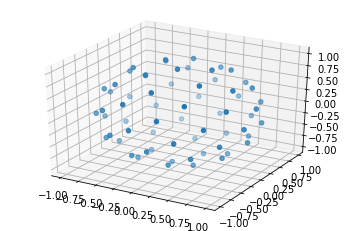

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pos[:,0], pos[:,1], pos[:,2])

In [23]:
2**12

4096

In [31]:
Nlist = []
dlist = []
for i in range(16):
    N = 2**i
    pos = gen_pos_golden_spiral(N)
    d = find_min_distance(pos)
    
    Nlist.append(N)
    dlist.append(d)

Nlist = np.array(Nlist)
dlist = np.array(dlist)

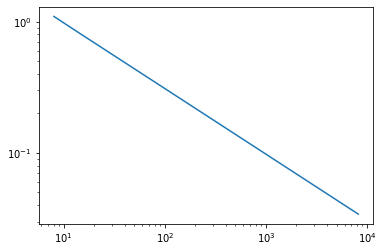

In [28]:
plt.plot(Nlist[3:], dlist[3:])
plt.xscale('log')
plt.yscale('log')

In [47]:
from scipy.optimize import curve_fit

def to_minimize(N, C):
    return C * np.sqrt(4*np.pi) * N**(-0.5)

popt, pcov = curve_fit(to_minimize, Nlist[7:], dlist[7:], sigma = 1./Nlist[7:])
print(popt)

[0.87224949]


In [ ]:
plt.scatter(Nlist, dlist)

x = np.logspace(0)

plt.xscale('log')
plt.yscale('log')